In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import math 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from scipy import stats
from scipy.stats import kurtosis, skew

%matplotlib inline

In [2]:
# Load the data
path ="oil_exxon.xlsx"
price_data = pd.read_excel(path)

#sets index to date column turns it into a true date
price_data.index = pd.to_datetime(price_data["date"])
price_data = price_data.drop("date", axis = 1)

price_data.head(5)

,exxon_price,oil_price
date,,
2014-03-28,97.699997,106.64
2014-03-31,97.680000,105.95
2014-04-01,97.730003,105.70
2014-04-02,97.949997,103.37
2014-04-03,97.930000,104.88


In [3]:
#Check the datatypes
price_data.dtypes

#Check for missing data & drop
price_data = price_data.dropna()
display(price_data.isna().any())

#price_data["exxon_price"] = price_data["exxon_price"].apply(np.int64)   -   How to convert dattypes using Pandas
 


exxon_price    False
oil_price      False
dtype: bool

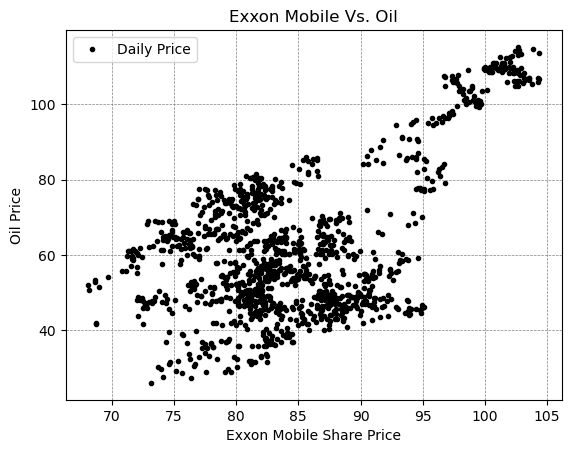

,exxon_price,oil_price
count,1248.000000,1248.000000
mean,84.802796,61.935000
std,7.424687,19.288424
min,68.120003,26.010000
25%,80.190002,48.162500
50%,83.024998,57.120000
75%,88.529999,70.725000
max,104.379997,115.190000


In [4]:
# define the data
x = price_data["exxon_price"]
y = price_data["oil_price"]

#create the scatter plot
plt.plot(x, y, ".", color = "black", label = "Daily Price")


#Formatting
plt.title("Exxon Mobile Vs. Oil")
plt.xlabel("Exxon Mobile Share Price")
plt.ylabel("Oil Price")
plt.legend()
plt.grid(color = "grey", linestyle = "--", linewidth = 0.5)
plt.show()


# Correlation
price_data.describe()
         

array([[<Axes: title={'center': 'exxon_price'}>,
        <Axes: title={'center': 'oil_price'}>]], dtype=object)

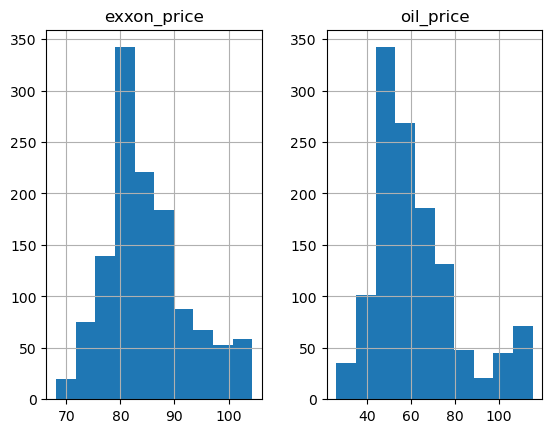

In [5]:
#Check for skewness
price_data.hist()

In [6]:
# calculate excess kurtosis using fisher method
exxon_kurtosis = kurtosis(price_data["exxon_price"], fisher = True)
oil_kurtosis = kurtosis(price_data["oil_price"], fisher = True)

#calculate the skewness
exxon_skew = skew(price_data["exxon_price"])
oil_skew = skew(price_data["oil_price"])

display("Exxon Kurtosis: {:.3}".format(exxon_kurtosis))
display("Oil Kurtosis: {:.3}".format(oil_kurtosis))

display("Exxon Skew: {:.3}".format(exxon_skew))
display("Oil Skew: {:.3}".format(oil_skew))


'Exxon Kurtosis: 0.0884'

'Oil Kurtosis: 0.532'

'Exxon Skew: 0.66'

'Oil Skew: 1.02'

In [41]:
# Split the data
Y = price_data[["exxon_price"]]
X = price_data[["oil_price"]]

display(Y)

# Split X and Y into X_
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2,random_state = 1)

,exxon_price
date,
2014-03-28,97.699997
2014-03-31,97.680000
2014-04-01,97.730003
2014-04-02,97.949997
2014-04-03,97.930000
...,...
2019-03-19,80.870003
2019-03-20,81.320000
2019-03-21,81.790001


In [25]:
# Create a linear regression model object
regression_model = LinearRegression()

# Pass through datasets
regression_model.fit(X_train, Y_train)

LinearRegression()

In [26]:
# Find the Coefficients and intercept of the linear model
intercept = regression_model.intercept_[0]
coefficient = regression_model.coef_[0][0]

print("Coefficient: {:.2}".format(coefficient))
print("Intercept: {:.4}".format(intercept))

Coefficient: 0.23
Intercept: 70.55


In [27]:
# Testing a prediction
prediction = regression_model.predict([[70]])
predicted_value = prediction[0][0]
print("Predicted Value: {:.4}".format(predicted_value))

Predicted Value: 86.61


C:\Users\osmit\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [28]:
# Getting multipe predicitons
y_predict = regression_model.predict(X_test)

# Show first 5 predictions
y_predict[:5]

array([[82.39718427],
       [83.0168246 ],
       [81.66738567],
       [79.18882438],
       [84.12070236]])

In [29]:
# Evaluate how useful the model is
X2 = sm.add_constant(X)

model = sm.OLS(Y,X2)

est = model.fit()

In [30]:
# make a confidence interval (95% default)

est.conf_int()

,0,1
const,69.358126,71.57579
oil_price,0.214372,0.24856


In [31]:
# Hypothesis testing
# P-Values (below 0.05)

est.pvalues

const         0.000000e+00
oil_price    1.423529e-123
dtype: float64

In [32]:
# imported these from sklearn

# calculate the mean squared error.
model_mse = mean_squared_error(Y_test, y_predict)

# calculate the mean absolute error.
model_mae = mean_absolute_error(Y_test, y_predict)

# calulcate the root mean squared error
model_rmse =  math.sqrt(model_mse)

# display the output
print("MSE {:.3}".format(model_mse))
print("MAE {:.3}".format(model_mae))
print("RMSE {:.3}".format(model_rmse))

MSE 38.8
MAE 5.05
RMSE 6.23


In [33]:
model_r2 = r2_score(Y_test, y_predict)
print("R2: {:.2}".format(model_r2))

# R2 is the quantified difference between the LOBF and the mean (https://youtu.be/2AQKmw14mHM)
# R2 = ( Var(mean) - Var(line)) / Var(mean)

# Var(mean) = sum of squared diff from data points to mean
# Var(line) = sum of squared diff from data points to line

# Therefore R2 is the percentage of variation difference between the line and the mean 
# ** AND the percentage of how much of variation is effected by the relationship (e.g: 81% of variation) ** 

R2: 0.36


In [34]:
# print out summary
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:            exxon_price   R-squared:                       0.362
Model:                            OLS   Adj. R-squared:                  0.361
Method:                 Least Squares   F-statistic:                     705.7
Date:                Thu, 27 Jul 2023   Prob (F-statistic):          1.42e-123
Time:                        17:53:31   Log-Likelihood:                -3992.3
No. Observations:                1248   AIC:                             7989.
Df Residuals:                    1246   BIC:                             7999.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         70.4670      0.565    124.678      0.0

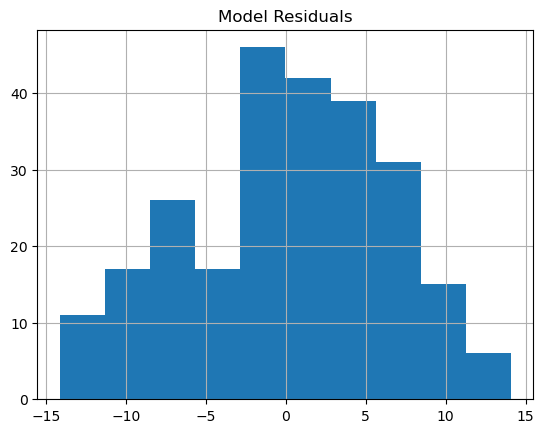

In [48]:
# Grab the residuals & then call the hist() method
(Y_test - y_predict).hist(grid = True)
plt.title("Model Residuals")
plt.show()

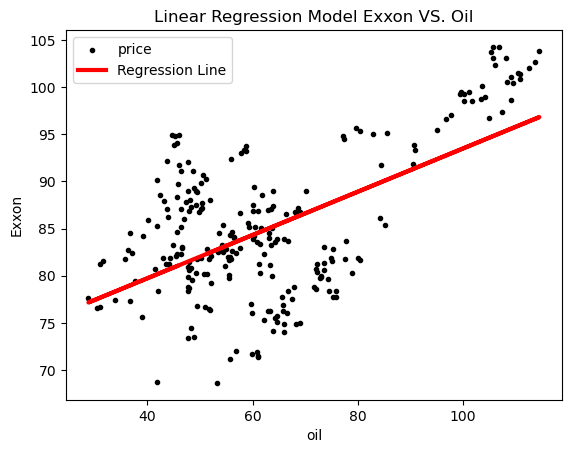

In [60]:
#plot the LOBF

plt.scatter(X_test,Y_test, marker = ".", color = "black", label = "price")
plt.plot(X_test, y_predict, color = "red", linewidth = 3, linestyle = "-", label = "Regression Line")
plt.title("Linear Regression Model Exxon VS. Oil")
plt.xlabel("oil")
plt.ylabel("Exxon")
plt.legend()
plt.show()


In [ ]:
import pickle

# pickle the model.
with open('my_linear_regression.sav','wb') as f:
     pickle.dump(regression_model,f)

# load it back in.
with open('my_linear_regression.sav', 'rb') as pickle_file:
     regression_model_2 = pickle.load(pickle_file)

# make a new prediction.
regression_model_2.predict([[67.33]])